In [48]:
from sklearn.cluster import KMeans # use kmeans algorithm in sklearn library 
from matplotlib.image import imread, imsave # read image, save result picture 
import numpy as np
import cv2

In [ ]:
# Read the image

In [11]:
img = imread('scenery.jpg')
img_size = img.shape


In [ ]:
# Reshape it to be 2-dimension

In [12]:
X = img.reshape(img_size[0] * img_size[1], img_size[2])
print("This image has {} pixels".format(len(X)))

This image has 2073600 pixels


In [ ]:
# Run the Kmeans algorithm

In [34]:
k = int(input("How many colors do you want? "))

How many colors do you want? 10


In [35]:
km = KMeans(n_clusters = k)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Use the centroids to compress the image

In [36]:
X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

In [ ]:
# Reshape X_recovered to have the same dimension as the original image

In [37]:
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

In [ ]:
# Plot the original and the compressed image next to each other

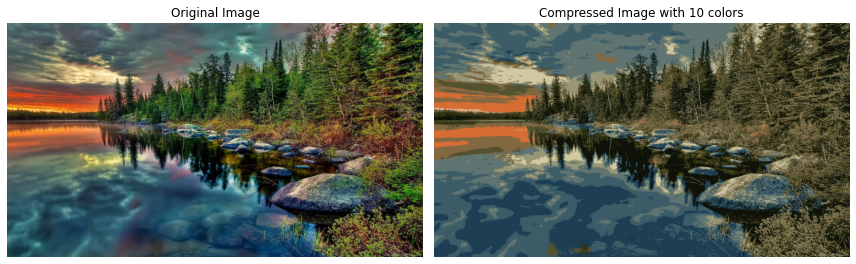

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with {} colors'.format(k))
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

In [52]:
imsave("result.jpg", X_compressed, dpi = 100)